[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Todti-I/python-hw-1/blob/main/homework-2/main.ipynb)

# Домашнее задание №2


Перед вами датасет с данными о вреде курения


Структура данных:

1. **gender**: Пол пациента
2. **age**: Возраст пациента
3. **hypertension**: Наличие гипертонии у пациента 1 - есть, 0 - не наблюдалось
4. **heart_disease**: Наличие у пациента болезней связанных с сердцем 1 - есть, 0 - здоров
5. **ever_married**: Брак - (Состоял в браке/ холост)
6. **work_type**: Работ - Ребенок(children), Госслужащий(Govt_jov), Никогда не работал(Never_worked), Самозанятый(self-employed) или Скрыто(private)
7. **Residence_type**: место работы городская среда(Urban)/удаленка или за городом(Rural)
8. **avg_glucose_level**: средний уровень глюкозы в крови
9. **bmi**: индекс массы тела
10. **smoking_status**: Пациент курит(Иногда, всегда, время от времени или Unknown - неизвестно)
11. **stroke**: Перенесенный инсульт (1 - пациент перенес инсульт, 0 - инсульта не было) - *ваш target*

## Ваша задача

№1 Восстановить целостностью данных, реализовать функцию позволяющие выполнять заполнение данных по среднему или по медианному значению в Series. 

1.  Заполнить пропуски
2.  Убрать дубликаты
3.  Убрать некорректные данные и.т.п.


№2 Построить baseline-модель, попытаться выбить лучший скор (сравнить несколько моделей)

№3 Сделать визуализацию для мини-исследования о вреде курения с разбивкой по половой принадлежности пациентов с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [ ]:
%pip install pandas
%pip install seaborn
%pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [3]:
url = 'https://drive.google.com/file/d/1He5GI5_Gd8uXYfeETLBISQ5BszX0o4pU/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url).drop('Unnamed: 0', axis=1).drop(0, axis=0).sample(frac=1).reset_index(drop=True)
column_types = {'gender':'str', 'age':'int', 'hypertension':'int', 'heart_disease':'int', 'ever_married':'str', 
                'work_type':'str', 'Residence_type':'str', 'avg_glucose_level':'float', 'bmi':'float', 
                'smoking_status':'str', 'stroke':'int'}
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,48.0,0.0,0.0,Yes,Private,NaN,77.99,31.2,formerly smoked,0
1,Male,16.0,0.0,0.0,No,NaN,Rural,111.93,NaN,never smoked,0
2,Female,56.0,0.0,0.0,Yes,Self-employed,Urban,224.63,42.8,never smoked,0
3,Male,52.0,0.0,1.0,No,Private,Rural,101.5,31.2,smokes,0
4,Female,60.0,0.0,0.0,Yes,NaN,Urban,65.38,NaN,formerly smoked,0
5,Female,76.0,0.0,0.0,Yes,Govt_job,NaN,223.64,27.1,smokes,0
6,Male,75.0,0.0,1.0,Yes,Self-employed,Urban,207.64,30.5,formerly smoked,0
7,Female,54.0,0.0,0.0,Yes,Self-employed,Rural,191.82,40.4,smokes,1
8,Female,40.0,0.0,NaN,Yes,Self-employed,Rural,NaN,49.8,formerly smoked,0
9,Male,NaN,0.0,1.0,Yes,Private,Urban,57.08,22.0,formerly smoked,0


### Функция позволяющая заполнить данные по среднему

In [4]:
def fill_nan_with_avg(df: pd.DataFrame, column_name: str):
    if not column_name in column_types:
        raise Exception(f'Invalid column name: {column_name}')
    column = df[column_name]
    if (column_types[column_name] == 'int'):
        normalized_column = column.apply(lambda x: int(float(x)) if not pd.isna(x) else x)
        avg = round(normalized_column.mean())
        return normalized_column.apply(lambda x: avg if pd.isna(x) else x).convert_dtypes()
    if (column_types[column_name] == 'float'):
        normalized_column = column.apply(lambda x: round(float(x), 2) if not pd.isna(x) else x)
        avg = round(normalized_column.mean(), 2)
        return normalized_column.apply(lambda x: avg if pd.isna(x) else x).convert_dtypes()
    if (column_types[column_name] == 'str'):
        avg = column.value_counts().idxmax()
        return column.apply(lambda x: avg if pd.isna(x) else x).convert_dtypes()
    return column.convert_dtypes()

In [5]:
data_with_avg = data.copy()
for column in data.columns:
    data_with_avg[column] = fill_nan_with_avg(data_with_avg, column)
data_with_avg.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,48,0,0,Yes,Private,Urban,77.99,31.2,formerly smoked,0
1,Male,16,0,0,No,Private,Rural,111.93,28.94,never smoked,0
2,Female,56,0,0,Yes,Self-employed,Urban,224.63,42.8,never smoked,0
3,Male,52,0,1,No,Private,Rural,101.5,31.2,smokes,0
4,Female,60,0,0,Yes,Private,Urban,65.38,28.94,formerly smoked,0
5,Female,76,0,0,Yes,Govt_job,Urban,223.64,27.1,smokes,0
6,Male,75,0,1,Yes,Self-employed,Urban,207.64,30.5,formerly smoked,0
7,Female,54,0,0,Yes,Self-employed,Rural,191.82,40.4,smokes,1
8,Female,40,0,0,Yes,Self-employed,Rural,105.9,49.8,formerly smoked,0
9,Male,43,0,1,Yes,Private,Urban,57.08,22.0,formerly smoked,0


### Функция позволяющая заполнить данные по медиане

In [6]:
def fill_nan_with_median(df: pd.DataFrame, column_name: str):
    if not column_name in column_types:
        raise Exception(f'Invalid column name: {column_name}')
    column = df[column_name]
    if (column_types[column_name] == 'int'):
        normalized_column = column.apply(lambda x: int(float(x)) if not pd.isna(x) else x)
        median = int(normalized_column.median())
        return normalized_column.apply(lambda x: median if pd.isna(x) else x).convert_dtypes()
    if (column_types[column_name] == 'float'):
        normalized_column = column.apply(lambda x: round(float(x), 2) if not pd.isna(x) else x)
        median = normalized_column.median()
        return normalized_column.apply(lambda x: median if pd.isna(x) else x).convert_dtypes()
    if (column_types[column_name] == 'str'): 
        strings_by_ids = {x:i for i,x in enumerate(column.unique())}
        column_by_ids = column.apply(lambda x: strings_by_ids.get(x) if not pd.isna(x) else x)
        median_by_id = int(column_by_ids.median())
        median = next(name for name,id in strings_by_ids.items() if id == median_by_id)
        return column.apply(lambda x: median if pd.isna(x) else x).convert_dtypes()
    return column.convert_dtypes()

In [7]:
data_with_median = data.copy()
for column in data.columns:
    data_with_median[column] = fill_nan_with_median(data_with_median, column)
data_with_median.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,48,0,0,Yes,Private,Urban,77.99,31.2,formerly smoked,0
1,Male,16,0,0,No,Private,Rural,111.93,28.1,never smoked,0
2,Female,56,0,0,Yes,Self-employed,Urban,224.63,42.8,never smoked,0
3,Male,52,0,1,No,Private,Rural,101.5,31.2,smokes,0
4,Female,60,0,0,Yes,Private,Urban,65.38,28.1,formerly smoked,0
5,Female,76,0,0,Yes,Govt_job,Urban,223.64,27.1,smokes,0
6,Male,75,0,1,Yes,Self-employed,Urban,207.64,30.5,formerly smoked,0
7,Female,54,0,0,Yes,Self-employed,Rural,191.82,40.4,smokes,1
8,Female,40,0,0,Yes,Self-employed,Rural,91.85,49.8,formerly smoked,0
9,Male,45,0,1,Yes,Private,Urban,57.08,22.0,formerly smoked,0


### Удаляем повторяющиеся строки

In [8]:
before = data_with_median.size
data_with_median = data_with_median.drop_duplicates(ignore_index=True).reset_index(drop=True)
after = data_with_median.size

print(f"Before: {before}")
print(f"After: {after}")

Before: 56210
After: 56166


### Убираем некорректные данные

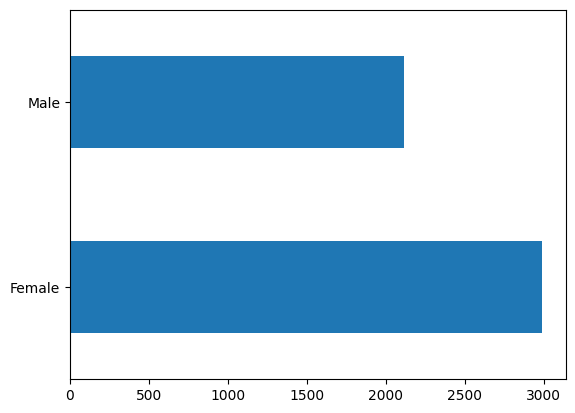

In [9]:
data_with_median = data_with_median.loc[data_with_median['gender'] != 'Other'].reset_index(drop=True)

data_with_median['gender'].value_counts().plot(kind='barh')
plt.show()

In [10]:
encoder = OrdinalEncoder()
features = data_with_median.drop("stroke", axis=1)
target = data_with_median["stroke"].astype('int')

encoding_series = features[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
features[encoding_series.columns] = pd.DataFrame(encoder.fit_transform(encoding_series), columns=encoding_series.columns).convert_dtypes()

### Обучаем модель адаптивного бустинга

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

abc = AdaBoostClassifier(random_state=777) 
grid_abc = GridSearchCV(abc, {
                                'n_estimators': [10,15,20,25,30],
                                'learning_rate': [0.5, 1, 1.5, 2],
                              })
grid_abc = grid_abc.fit(x_train, y_train)

y_pred = grid_abc.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
accuracy = accuracy_score(y_test, y_pred)

print(f'best params: {grid_abc.best_params_}')
print(f'precision = {precision}\nrecall = {recall}\naccuracy = {accuracy}')

best params: {'learning_rate': 0.5, 'n_estimators': 10}
precision = 0.9530148786217699
recall = 1.0
accuracy = 0.9530148786217698


### Обучаем модель случайного леса

In [12]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

rfc = RandomForestClassifier(random_state=777) 
grid_rfc = GridSearchCV(rfc, {
                                'n_estimators': [10,15,20,25,30],
                                'min_samples_split': [2,4,8,10],
                              })
grid_rfc = grid_rfc.fit(x_train, y_train)

y_pred = grid_rfc.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
accuracy = accuracy_score(y_test, y_pred)

print(f'best params: {grid_rfc.best_params_}')
print(f'precision = {precision}\nrecall = {recall}\naccuracy = {accuracy}')

best params: {'min_samples_split': 8, 'n_estimators': 10}
precision = 0.8977803580590284
recall = 0.9467501957713391
accuracy = 0.9467501957713391


### Проводим исследование

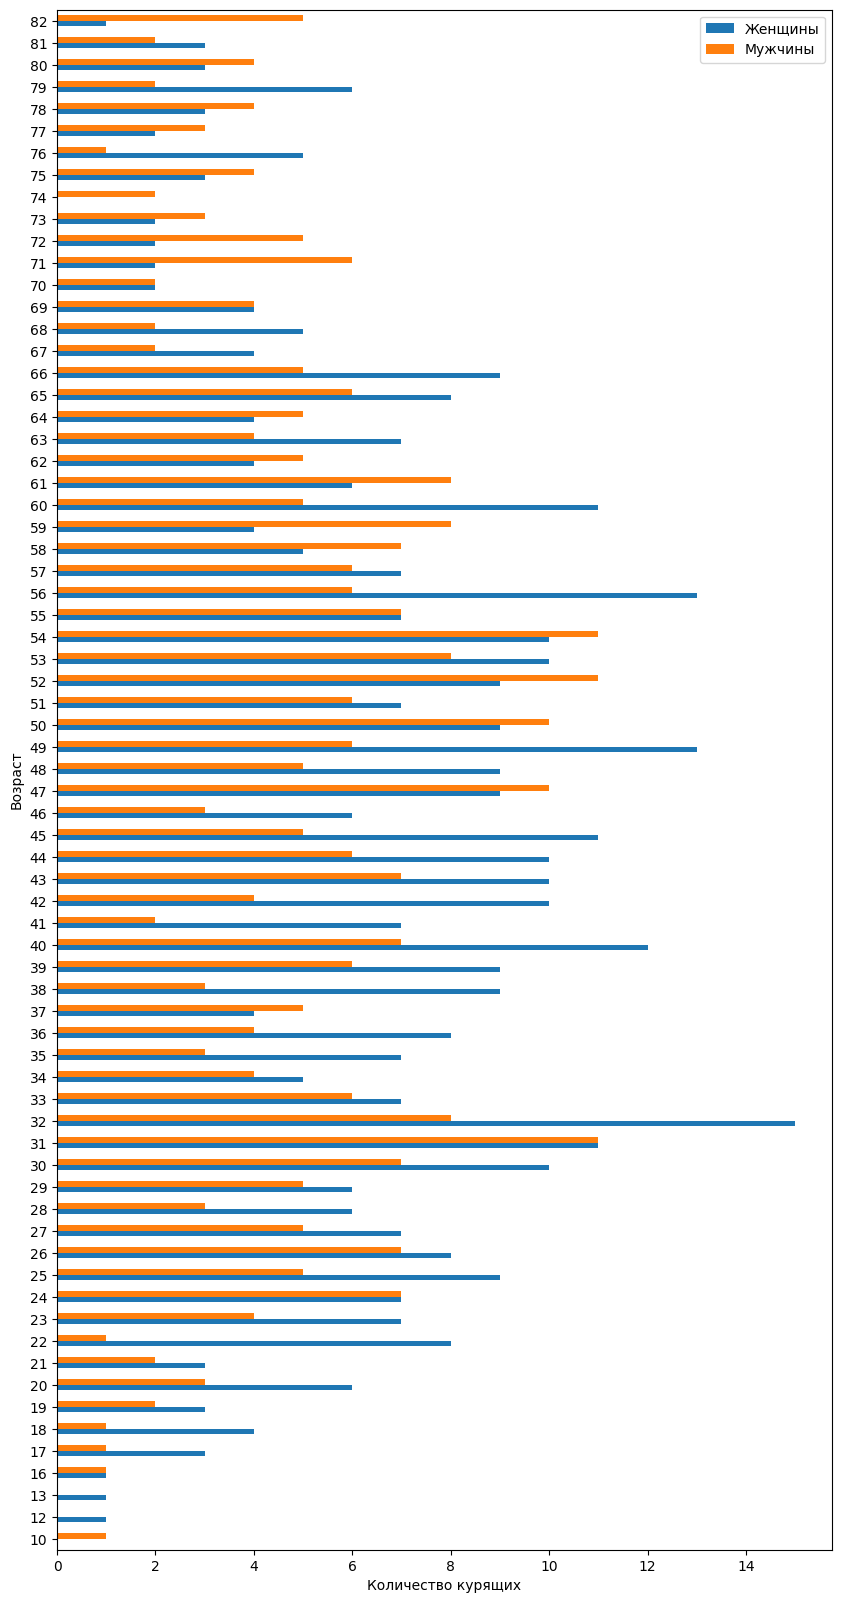

In [13]:
plt.rcParams["figure.figsize"] = (10,20)

data_by_ages = data.loc[data['smoking_status'] == 'smokes'].groupby(['age', 'gender']).size().reset_index(name='count')
data_by_ages['age'] = data_by_ages['age'].apply(lambda x: int(float(x)))
data_by_ages = data_by_ages.set_index(['age', 'gender'])
data_by_ages.unstack(level='gender').plot(kind='barh')
plt.xlabel('Количество курящих')
plt.ylabel('Возраст')
plt.legend(['Женщины', 'Мужчины'])
plt.show()

По графику видно, что большего всего мужчин курит в возрасте с 25 по 32 и с 48 по 56 лет. У женщин самые большие пики в районе 31 года и диапазоне с 47 по 54 года.

In [14]:
male_data = data.loc[data['gender'] == 'Male'].reset_index(drop=True)
female_data = data.loc[data['gender'] == 'Female'].reset_index(drop=True)

smoking_statuses = {'Unknown':'Неизвестно', 'never smoked':'Не курил', 'formerly smoked':'Раньше курил', 'smokes':'Курит'}
def translate_smoking_status(smoking_status: str):
  return smoking_statuses.get(smoking_status)

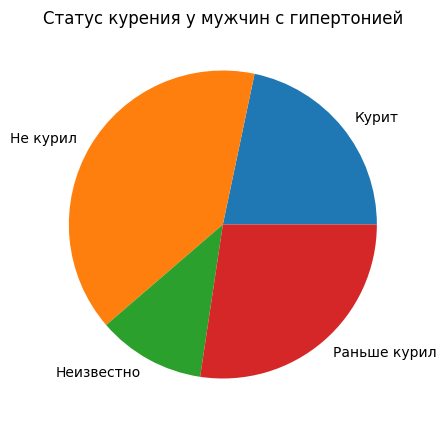

In [15]:
plt.rcParams["figure.figsize"] = (5,5)

male_data.loc[male_data['hypertension'] == '1.0']['smoking_status'].apply(translate_smoking_status).value_counts().sort_index().plot(kind='pie')
plt.title('Статус курения у мужчин с гипертонией')
plt.ylabel('')
plt.show()

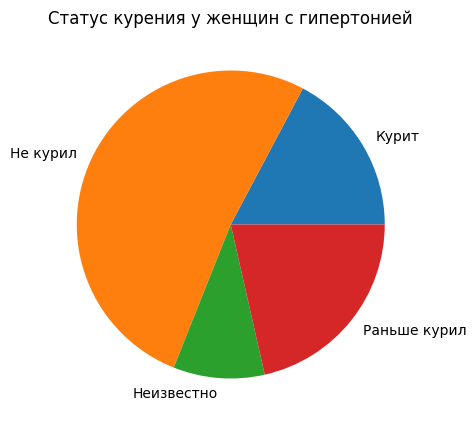

In [16]:
plt.rcParams["figure.figsize"] = (5,5)

female_data.loc[female_data['hypertension'] == '1.0']['smoking_status'].apply(translate_smoking_status).value_counts().sort_index().plot(kind='pie')
plt.title('Статус курения у женщин с гипертонией')
plt.ylabel('')
plt.show()

В сводке по мужчинам и женщинам с гипертонией прослеживается статистика того, что больше всего не курящих людей, а меньшая часть посвящена регулярно курящим.

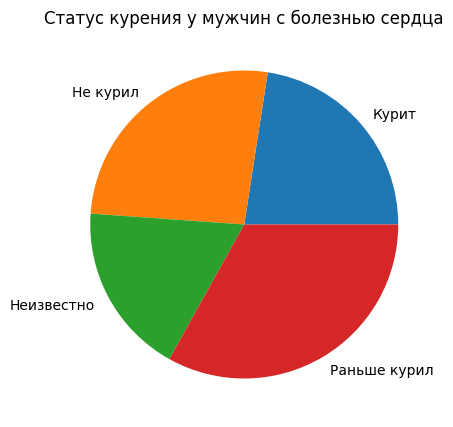

In [17]:
plt.rcParams["figure.figsize"] = (5,5)

male_data.loc[male_data['heart_disease'] == '1.0']['smoking_status'].apply(translate_smoking_status).value_counts().sort_index().plot(kind='pie')
plt.title('Статус курения у мужчин с болезнью сердца')
plt.ylabel('')
plt.show()

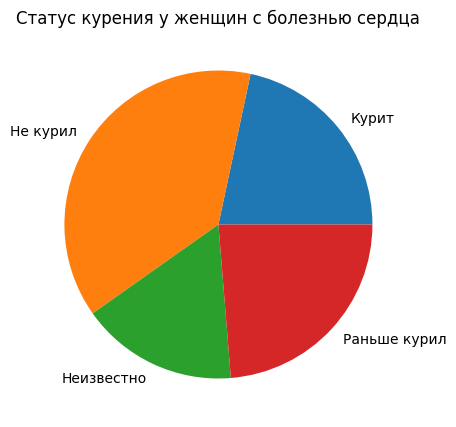

In [18]:
plt.rcParams["figure.figsize"] = (5,5)

female_data.loc[female_data['heart_disease'] == '1.0']['smoking_status'].apply(translate_smoking_status).value_counts().sort_index().plot(kind='pie')
plt.title('Статус курения у женщин с болезнью сердца')
plt.ylabel('')
plt.show()

Из сводок можно заметить, что болезнь связанная с сердцем преобладает у мужчин, которые бросили курить, а у женщин, которые вообще не курили.